In [41]:
import numpy as np # biblioteca numeryczna
import sympy as sp # biblioteka do obliczeń symbolicznych

# Wprowadzenie

W niniejszym notebooku zaprezentowane zostaną podstawowe operacje na macierzach w języku Python. W tym celu wykorzystane zostaną dwie biblioteki: NumPy oraz SymPy. NumPy jest biblioteką numeryczną, która pozwala na wykonywanie operacji na macierzach, wektorach oraz tensorach. SymPy jest biblioteką do obliczeń symbolicznych, która pozwala na wykonywanie operacji na zmiennych symbolicznych. W poniższych przykładach zostaną przedstawione podstawowe operacje na macierzach, takie jak dodawanie, mnożenie, odwrotność macierzy.

# 1.1 Podstawowe numeryczne operacje na macierzach

In [42]:
# Zdefiniujmy macierz A
A = np.array([[1, 2], [3, 4]])
A

array([[1, 2],
       [3, 4]])

In [43]:
# Zdefiniujmy macierz B
B = np.array([[5, 6], [7, 8]])
B

array([[5, 6],
       [7, 8]])

In [44]:
# Informacje o macierzy
print("Rozmiar macierzy A: ", A.shape)

Rozmiar macierzy A:  (2, 2)


In [45]:
# pierwszy wiersz
print("Pierwszy wiersz macierzy A: ", A[0,:])

Pierwszy wiersz macierzy A:  [1 2]


In [46]:
# pierwsza kolumna
print("Pierwsza kolumna macierzy A:", A[:,0])

Pierwsza kolumna macierzy A: [1 3]


In [47]:
# Dodawanie macierzy
C = A + B
C

array([[ 6,  8],
       [10, 12]])

In [48]:
# Mnożenie macierzy
D = A @ B
D

array([[19, 22],
       [43, 50]])

In [49]:
# Odwrotność macierzy
E = np.linalg.inv(A)
E

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [50]:
# własności macierzy odwrotnej A * A_inv = A_inv * A = I
np.dot(A, E)

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

# Przykład rozwiązania układu równań

Teraz możemy wykorzystać bibliotekę w.w. rozwiązania układu równań
Załóżmy, że mamy układ równań:

\begin{equation}
\begin{cases}
x + 2y = 5 \\
3x + 4y = 7
\end{cases}
\end{equation}

Rozwiązanie tego układu równań można zapisać w postaci macierzowej. W naszym przypadku układ równań można zapisać jako:

\begin{equation}
\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}   
=
\begin{bmatrix}
5 \\
7
\end{bmatrix}
\end{equation}

Zakodujmy to w Pythonie za pomocą biblioteki NumPy:

In [51]:
# Zdefiniujmy macierz A
A = np.array([[1, 2], [3, 4]])
# Zdefiniujmy wektor wynikowy
b = np.array([5, 7])
# Rozwiązanie układu równań
x = np.linalg.solve(A, b)
x

array([-3.,  4.])

In [52]:
# Sprawdzenie rozwiązania
np.dot(A, x)

array([5., 7.])

Rozwiązanie przez obliczenie odwrotności macierzy:

\begin{equation}
\begin{bmatrix}
x \\
y
\end{bmatrix}
=
\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}^{-1}
\begin{bmatrix}
5 \\
7
\end{bmatrix}
\end{equation}


In [53]:
# Obliczenie odwrotności macierzy
A_inv = np.linalg.inv(A)
# Rozwiązanie układu równań
x = A_inv @ b
x

array([-3.,  4.])

# Przykład optymalizacji linowej

Minimalizacja funkcji celu:
$$
\text{Minimalizacja} \quad -x_1 + 4x_2
$$

Przy ograniczeniach:
\begin{align*}
& x_1 + x_2 \leq 6 \\
& -3x_1 + x_2 \leq 2\\
& x_1 \geq 0, x_2 \geq 0
\end{align*}

WWW: https://pl.wikipedia.org/wiki/Programowanie_liniowe

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Definicja funkcji celu i ograniczeń
c = np.array([-1, 4])  # współczynniki funkcji celu do minimalizacji: -x1 + 4x2
A = np.array([[1, 1], [-3, 1]])  # macierz współczynników ograniczeń lewostronnych
b = np.array([6, 2])  # wektor ograniczeń lewostronnych

# Dodanie ograniczeń non-negativity dla x1 i x2
x1_bounds = (0, None)
x2_bounds = (0, None)

# Rozwiązanie problemu optymalizacji liniowej z uwzględnieniem ograniczeń non-negativity
res = linprog(c, A_ub=A, b_ub=b, bounds=[x1_bounds, x2_bounds])

# Wydrukowanie wyników
print("Wartości zmiennych decyzyjnych:")
print(res.x)
print("Wartość funkcji celu (minimalna wartość):", res.fun)

Wartości zmiennych decyzyjnych:
[6. 0.]
Wartość funkcji celu (minimalna wartość): -6.0


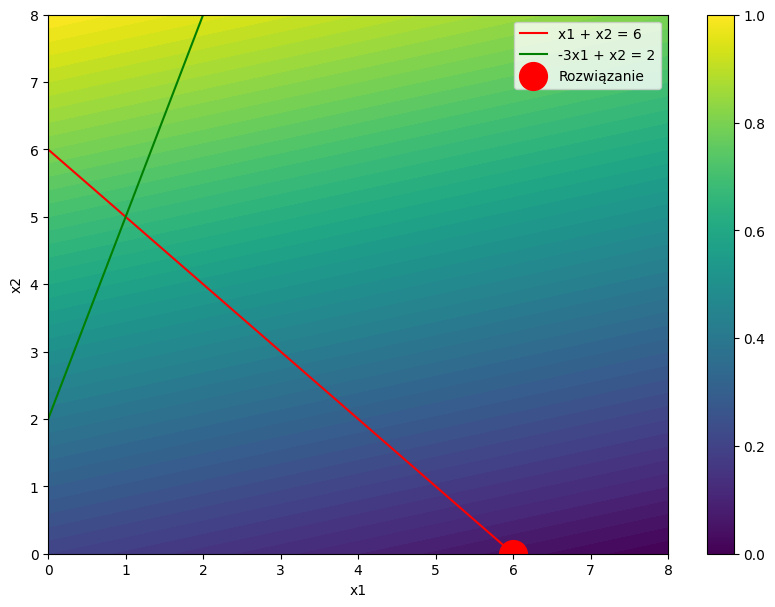

In [55]:
# Wizualizacja
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)

x1 = np.linspace(0, 8, 100)
x2 = np.linspace(0, 8, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = -X1 + 4*X2

plt.contourf(X1, X2, Z, levels=50)
plt.plot([0, 6], [6, 0], 'r', label='x1 + x2 = 6')
plt.plot([0, 2], [2, 8], 'g', label='-3x1 + x2 = 2')
plt.scatter(res.x[0], res.x[1], color='red', label='Rozwiązanie', s=400)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.colorbar()

plt.xlim(0, 8)
plt.ylim(0, 8)

plt.show()

# 1.2 Operacje na macierzach w bibliotece SymPy

In [56]:
# Zdefiniujmy macierz A
A = sp.Matrix([[1, 2], [3, 4]])
A

Matrix([
[1, 2],
[3, 4]])

In [57]:
# Zdefiniujmy macierz B
B = sp.Matrix([[5, 6], [7, 8]])
B

Matrix([
[5, 6],
[7, 8]])

In [58]:
# Mnożenie macierzy
C = A * B
C

Matrix([
[19, 22],
[43, 50]])

In [59]:
# Odwrotność macierzy
D = A.inv()
D

Matrix([
[ -2,    1],
[3/2, -1/2]])

# Macierzowy opis obrotów

Załóżmy, że mamy punkt $(x,y)$ w przedstawiony w układzie współrzędnych kartezjańskich. Chcemy wykonać obroty tego punktu o kąty $\alpha$ wokół centrum układu współrzędnych. Współrzędne punktu po obrocie o kąt $\alpha$ to $(x', y')$. Możemy to zapisać w postaci macierzowej:

\begin{equation}
\begin{bmatrix}
x' \\
y'
\end{bmatrix}
=
\begin{bmatrix}
\cos(\alpha) & -\sin(\alpha) \\
\sin(\alpha) & \cos(\alpha)
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
\end{equation}

WWW: https://pl.wikipedia.org/wiki/Obr%C3%B3t


In [60]:
# Składanie obrotów
alpha, beta = sp.symbols('alpha beta')
R_alpha = sp.Matrix([[sp.cos(alpha), -sp.sin(alpha)], [sp.sin(alpha), sp.cos(alpha)]])
R_beta = sp.Matrix([[sp.cos(beta), -sp.sin(beta)], [sp.sin(beta), sp.cos(beta)]])
R_alpha

Matrix([
[cos(alpha), -sin(alpha)],
[sin(alpha),  cos(alpha)]])

In [61]:
R_alpha * R_beta

Matrix([
[-sin(alpha)*sin(beta) + cos(alpha)*cos(beta), -sin(alpha)*cos(beta) - sin(beta)*cos(alpha)],
[ sin(alpha)*cos(beta) + sin(beta)*cos(alpha), -sin(alpha)*sin(beta) + cos(alpha)*cos(beta)]])

In [62]:
# uprośćmy wynik
simplified_result = (R_alpha * R_beta).applyfunc(sp.trigsimp)
simplified_result

Matrix([
[cos(alpha + beta), -sin(alpha + beta)],
[sin(alpha + beta),  cos(alpha + beta)]])

In [63]:
# Obrót w przestrzeni 3D
alpha, beta, gamma = sp.symbols('alpha beta gamma')
R_alpha = sp.Matrix([[sp.cos(alpha), -sp.sin(alpha), 0], [sp.sin(alpha), sp.cos(alpha), 0], [0, 0, 1]])
R_beta = sp.Matrix([[sp.cos(beta), 0, -sp.sin(beta)], [0, 1, 0], [sp.sin(beta), 0, sp.cos(beta)]])
R_gamma = sp.Matrix([[1, 0, 0], [0, sp.cos(gamma), -sp.sin(gamma)], [0, sp.sin(gamma), sp.cos(gamma)]])
R_alpha

Matrix([
[cos(alpha), -sin(alpha), 0],
[sin(alpha),  cos(alpha), 0],
[         0,           0, 1]])

In [64]:
R_beta

Matrix([
[cos(beta), 0, -sin(beta)],
[        0, 1,          0],
[sin(beta), 0,  cos(beta)]])

In [65]:
R_gamma

Matrix([
[1,          0,           0],
[0, cos(gamma), -sin(gamma)],
[0, sin(gamma),  cos(gamma)]])

In [66]:
R = R_alpha * R_beta * R_gamma
R

Matrix([
[cos(alpha)*cos(beta), -sin(alpha)*cos(gamma) - sin(beta)*sin(gamma)*cos(alpha),  sin(alpha)*sin(gamma) - sin(beta)*cos(alpha)*cos(gamma)],
[sin(alpha)*cos(beta), -sin(alpha)*sin(beta)*sin(gamma) + cos(alpha)*cos(gamma), -sin(alpha)*sin(beta)*cos(gamma) - sin(gamma)*cos(alpha)],
[           sin(beta),                                     sin(gamma)*cos(beta),                                     cos(beta)*cos(gamma)]])